In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import listoflist

In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
import spacy

# Download the English language model
spacy.cli.download("en_core_web_sm")

# Load the model
nlp = spacy.load("en_core_web_sm")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [33]:
df = pd.read_excel("Data Analyst - Test Data.xlsx")

In [34]:
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Review    6393 non-null   object        
 1   date      6448 non-null   datetime64[ns]
 2   Location  1711 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 151.2+ KB


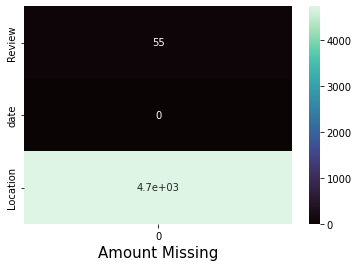

In [36]:
sns.heatmap(df.isna().sum().to_frame(),annot=True,cmap='mako')
plt.xlabel('Amount Missing',fontsize=15)
plt.show()

In [37]:
df.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

In [38]:

df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor


In [39]:
df = df.dropna()

In [40]:
df.isna().sum()

Review      0
date        0
Location    0
dtype: int64

In [41]:
df.reset_index(drop=True, inplace=True)

In [42]:
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor
4,Very clean and friendly and I love the locatio...,2019-08-19,California


In [43]:
df.Review[0]

'I was very impressed with the resort.\n Great staff at the main resort pool bar! We had a blast with them.\n Clean, professional staff, great location and very reasonable!\n  \n  Read more\n  Read less'

In [44]:
df['Review'] = df['Review'].str.replace("\n","")

In [45]:
df['Review'] = df['Review'].str.replace("Read more","")

In [46]:
df['Review'] = df['Review'].str.replace("Read less","")

In [47]:
import re
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [48]:
df.Review.head()

0    I was very impressed with the resort Great sta...
1    The rooms were nice the outside needs work als...
2    Great location I have stayed at this hotel on ...
3    Great location room was large and spacious Par...
4    Very clean and friendly and I love the locatio...
Name: Review, dtype: object

In [49]:
df.Review[0]

'I was very impressed with the resort Great staff at the main resort pool bar We had a blast with them Clean professional staff great location and very reasonable      '

In [50]:
def senti(review):
    if sid.polarity_scores(review)['compound'] >= 0:
        return 'pos'
    else:
        return 'neg'

In [51]:
df['sentiment'] = df['Review'].apply(lambda x: senti(x))

In [52]:
df.head()

,Review,date,Location,sentiment
0,I was very impressed with the resort Great sta...,2019-08-20,Sebastian,pos
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,pos
2,Great location I have stayed at this hotel on ...,2019-08-20,Georgia,pos
3,Great location room was large and spacious Par...,2019-08-19,Palm Harbor,pos
4,Very clean and friendly and I love the locatio...,2019-08-19,California,pos


<AxesSubplot:xlabel='sentiment', ylabel='count'>

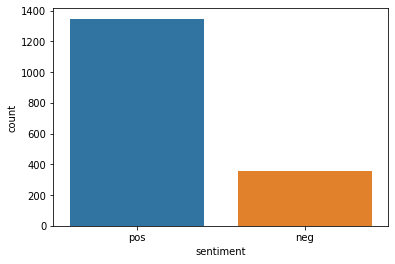

In [53]:
sns.countplot(x='sentiment',data=df)

In [54]:
df['sentiment'] = df['Review'].apply(lambda x: senti(x))

In [55]:
df.head(5)

,Review,date,Location,sentiment
0,I was very impressed with the resort Great sta...,2019-08-20,Sebastian,pos
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,pos
2,Great location I have stayed at this hotel on ...,2019-08-20,Georgia,pos
3,Great location room was large and spacious Par...,2019-08-19,Palm Harbor,pos
4,Very clean and friendly and I love the locatio...,2019-08-19,California,pos


In [56]:
new_df = df[(df['Location'] == 'Canada') | (df['Location'] == 'Los Angeles') | (df['Location'] == 'Georgia') | (df['Location'] == 'United Kingdom') | (df['Location'] == 'California')]


<AxesSubplot:xlabel='Location', ylabel='count'>

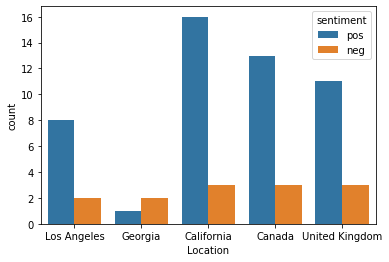

In [57]:
sns.countplot(x='Location',data=new_df,hue='sentiment')

In [58]:
def pos_tagging(data):
    # Define the desired part-of-speech tag(s)
    req_tag = ['NN']
    # List to store the extracted words
    extracted_words = []
    i = 0
    
    try:
        for x in data['Review']:
            doc = nlp(x)
            for token in doc:
                i += 1
                # Check if the token's part-of-speech tag is in the desired list ('req_tag')
                # Also, filter out tokens with certain shapes ('x', 'xx', 'xxx')
                if token.tag_ in req_tag and token.shape_ not in ['x', 'xx', 'xxx']:
                    # Append the lemma of the token to the list of extracted words
                    extracted_words.append(token.lemma_)

        # Return the list of extracted words
        return extracted_words
    
    except Exception as e:
        # If an exception occurs during processing, return the list of extracted words as-is
        return extracted_words


In [59]:
extracted_words = pos_tagging(df)

In [60]:
ser = pd.Series(extracted_words).value_counts().head(10)
index = ser.index
value = ser.values


In [61]:
index

Index(['room', 'hotel', 'staff', 'location', 'property', 'time', 'desk',
       'night', 'service', 'parking'],
      dtype='object')

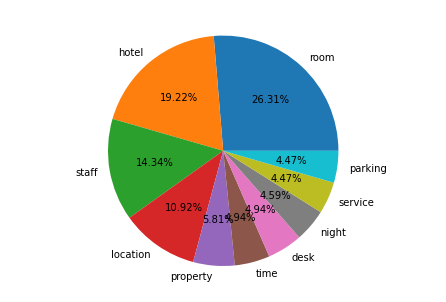

In [62]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
freq = index
val = value
ax.pie(val, labels = freq,autopct='%1.2f%%')
plt.show()

In [63]:
# Lists to store extracted aspects and their corresponding descriptive terms
aspect = []
description = []

for sentence in df['Review']:
    # Process the sentence using spaCy's NLP pipeline
    doc = nlp(sentence)
    
    # Variables to store the descriptive term and target aspect for the current sentence
    descriptive_term = ''
    target = ''
    
    for token in doc:
        # Check if the token is a nominal subject (nsubj) and a noun
        if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
            target = token.text
        
        # Check if the token is an adjective
        if token.pos_ == 'ADJ':
            prepend = ''
            
            # Iterate through the children of the adjective token
            for child in token.children:
                # Check if the child is an adverb and append it to the prepend string
                if child.pos_ != 'ADV':
                    continue
                prepend += child.text + ' '
            
            # Combine the adverb-prepended adjective with the adjective itself
            descriptive_term = prepend + token.text
    
    # Append the target aspect and descriptive term to the respective lists
    aspect.append(target)
    description.append(descriptive_term)

In [64]:
df['aspect'] = aspect
df['description'] = description

In [65]:
df.head()


,Review,date,Location,sentiment,aspect,description
0,I was very impressed with the resort Great sta...,2019-08-20,Sebastian,pos,,very reasonable
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,pos,outside,ok
2,Great location I have stayed at this hotel on ...,2019-08-20,Georgia,pos,,last
3,Great location room was large and spacious Par...,2019-08-19,Palm Harbor,pos,Parking,friendly
4,Very clean and friendly and I love the locatio...,2019-08-19,California,pos,bathrooms,vintage


In [66]:
df['aspect'] = df['aspect'].str.replace('beds','bed')
df['aspect'] = df['aspect'].str.replace('rooms','room')

In [67]:
df['aspect'].value_counts().head(10)

            524
room        143
staff       107
hotel        64
location     51
bed          30
property     28
service      16
Rooms        15
parking      13
Name: aspect, dtype: int64

In [68]:
new = df[(df['aspect'] == 'room') | (df['aspect'] == 'staff') | (df['aspect'] == 'hotel') |(df['aspect'] == 'location') | (df['aspect'] == 'bed') |(df['aspect'] == 'service')][['sentiment','aspect']]


<AxesSubplot:xlabel='aspect', ylabel='count'>

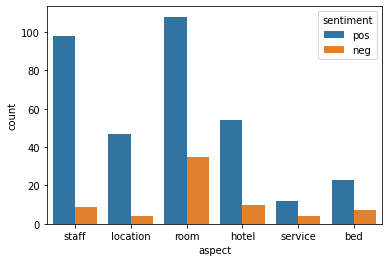

In [69]:

sns.countplot(x='aspect',data=new, hue='sentiment')

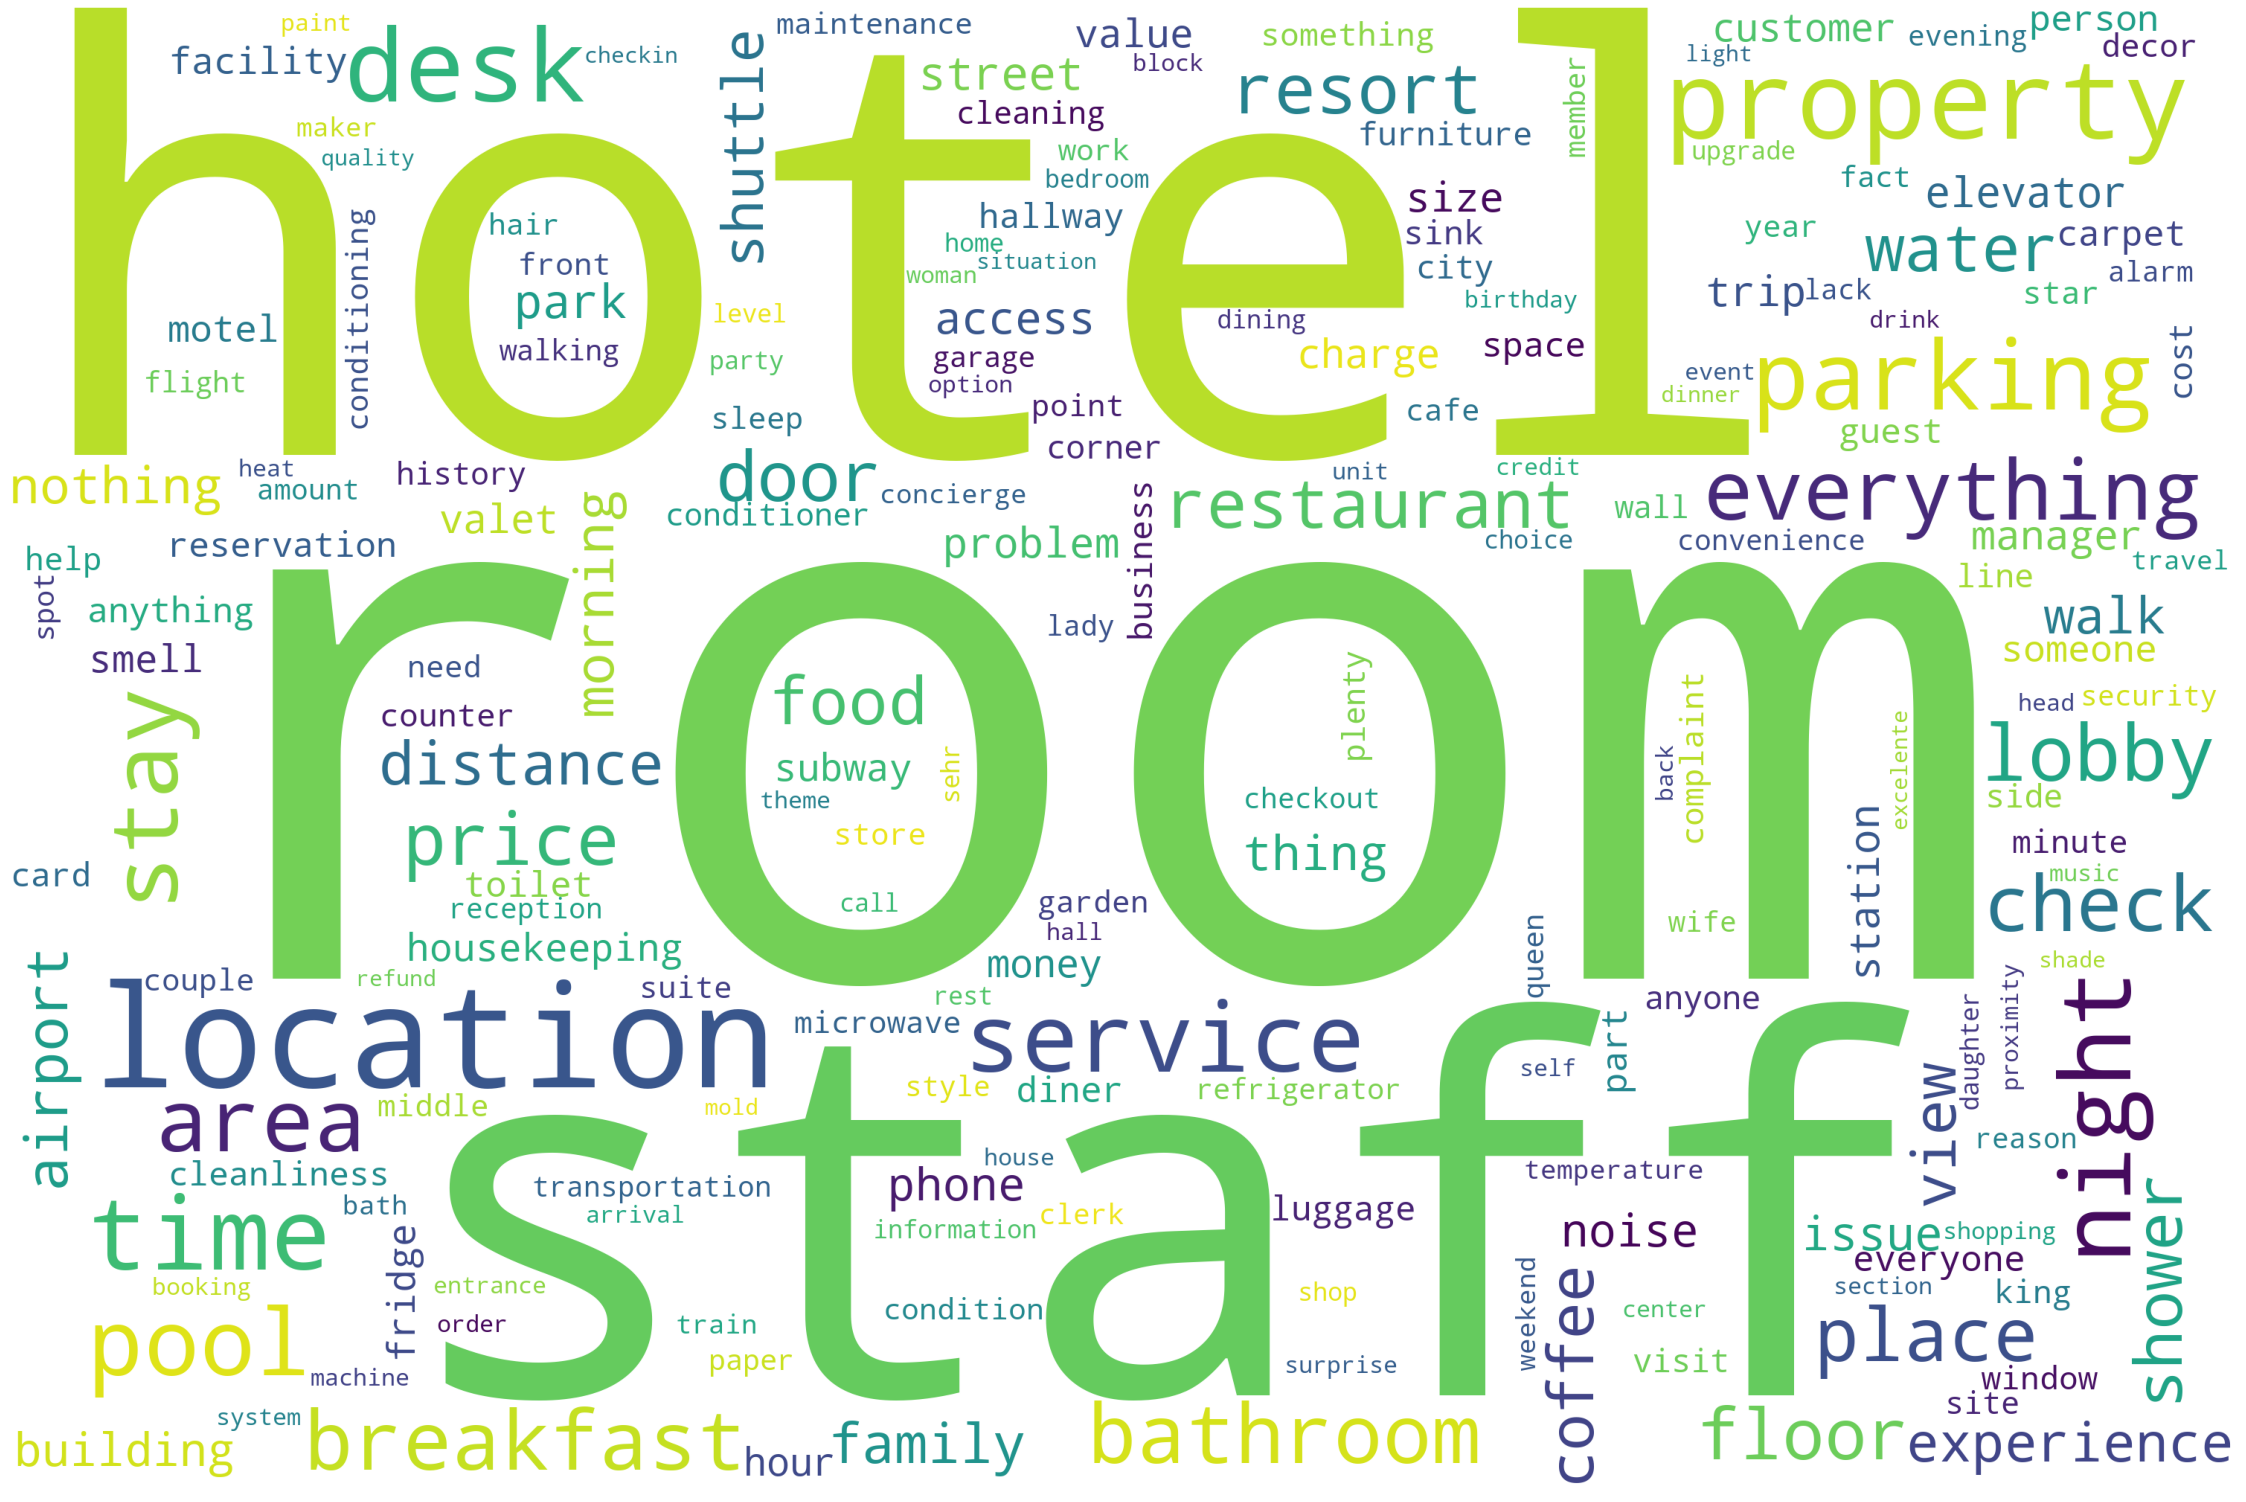

In [70]:
# Import necessary libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    # Set the figure size for the plot
    plt.figure(figsize=(40, 30))

    # Display the word cloud image
    plt.imshow(wordcloud)

    # Turn off the axis
    plt.axis("off")

# Join the extracted words into a single string
unique_string = (" ").join(extracted_words)

# Create a WordCloud object with specified parameters
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='white',
    random_state=1,
    collocations=False,  # Disable collocations to avoid grouping common word pairs
    stopwords=STOPWORDS  # Remove common English stopwords
).generate(unique_string)

# Call the plot_cloud function to display the WordCloud
plot_cloud(wordcloud)
